In [1]:
import transit_model as tm
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import networkx as nx

In [2]:
n_passengers = 10000

n_stops_range = [1, 2, 3, 4, 5]
replicates = 3
max_steps = 1e3

n_stops = []
transit_times = []


for n in n_stops_range:
    print(f'running simulations for n_stops = {n}')
    for r in range(replicates):
        g, passengers = tm.initialize(n_passengers=n_passengers,
                                      node_capacity=50,
                                      intermediate_stops=n)
        temp_transit_times = tm.update(g=g,
                                       passengers=passengers,
                                       max_run_steps=max_steps)
        if len(temp_transit_times) == n_passengers:
            transit_times.extend(temp_transit_times)
            n_stops.extend([n]*len(temp_transit_times))
        else:
            print(f'simulation with capacity of {n} is has only {len(temp_transit_times)}/{n_passengers} completed')

running simulations for n_stops = 1
running simulations for n_stops = 2
running simulations for n_stops = 3
running simulations for n_stops = 4
running simulations for n_stops = 5


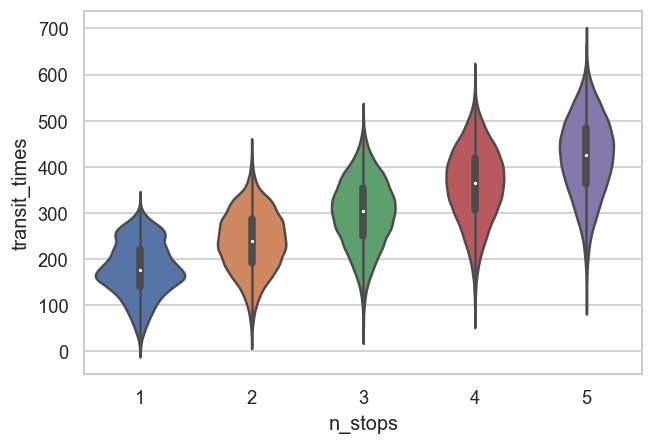

In [3]:
trip_chain_dict = {'n_stops':n_stops, 'transit_times':transit_times, 'network':['CTA']*len(n_stops)}
data_base_grid = pd.DataFrame.from_dict(trip_chain_dict)



sns.set(style="whitegrid")
plt.figure(dpi=120)
sns.violinplot(x='n_stops', y='transit_times', data=data_base_grid, alpha=0.5, saturation=0.8)
plt.show()

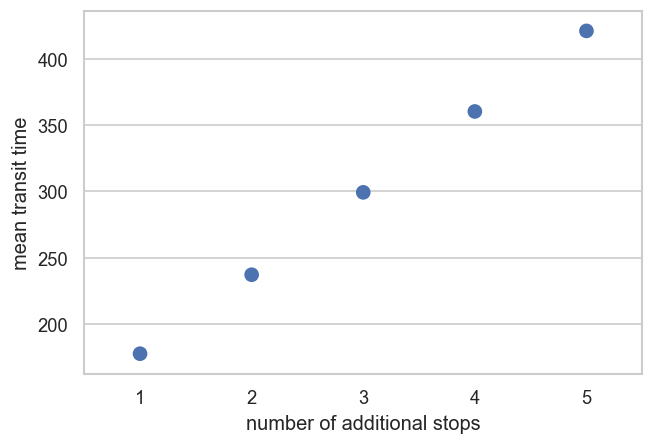

In [4]:
sns.set(style="whitegrid")
plt.figure(dpi=120)
sns.pointplot(x='n_stops', y='transit_times', data=data_base_grid, estimator=np.mean, alpha=0.3, saturation=0.7, ci=68, join=False, color='C0')
plt.xlabel('number of additional stops')
plt.ylabel('mean transit time')
plt.show()

## Add the new line

In [5]:
n_passengers = 10000

n_stops_range = [1, 2, 3, 4, 5]
replicates = 3
max_steps = 1e3

n_stops = []
transit_times = []

for n in n_stops_range:
    print(f'running simulations for n_stops = {n}')
    for r in range(replicates):
        g, passengers = tm.initialize(n_passengers=n_passengers,
                                      node_capacity=20,
                                      intermediate_stops=n)
        g = tm.add_line('CTA_data/new_line_1.txt', g, 'lightblue')
        temp_transit_times = tm.update(g=g,
                                       passengers=passengers,
                                       max_run_steps=max_steps)
        if len(temp_transit_times) == n_passengers:
            transit_times.extend(temp_transit_times)
            n_stops.extend([n]*len(temp_transit_times))
        else:
            print(f'simulation with capacity of {n} is has only {len(temp_transit_times)}/{n_passengers} completed')
            


running simulations for n_stops = 1
running simulations for n_stops = 2
running simulations for n_stops = 3
running simulations for n_stops = 4
running simulations for n_stops = 5


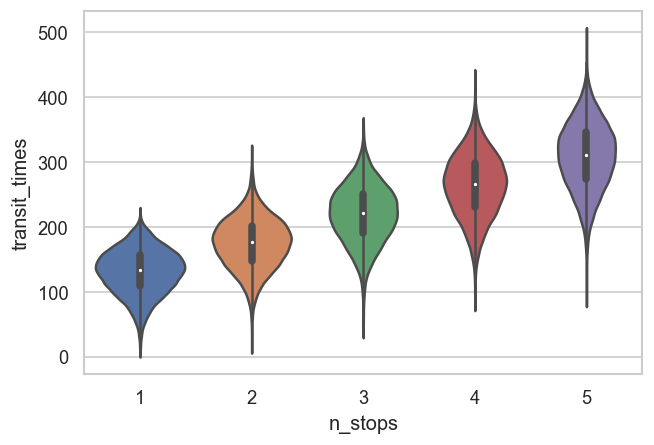

In [6]:
trip_chain_dict = {'n_stops':n_stops, 'transit_times':transit_times, 'network':['CTA_1']*len(n_stops)}
data_extra_line = pd.DataFrame.from_dict(trip_chain_dict)


sns.set(style="whitegrid")
plt.figure(dpi=120)
sns.violinplot(x='n_stops', y='transit_times', data=data_extra_line, alpha=0.5, saturation=0.8)
plt.show()

In [10]:
data = pd.concat([data_base_grid, data_extra_line])
data

,n_stops,transit_times,network
0,1,8,CTA
1,1,2,CTA
2,1,5,CTA
3,1,8,CTA
4,1,5,CTA
...,...,...,...
149995,5,426,CTA_1
149996,5,411,CTA_1
149997,5,390,CTA_1
149998,5,419,CTA_1


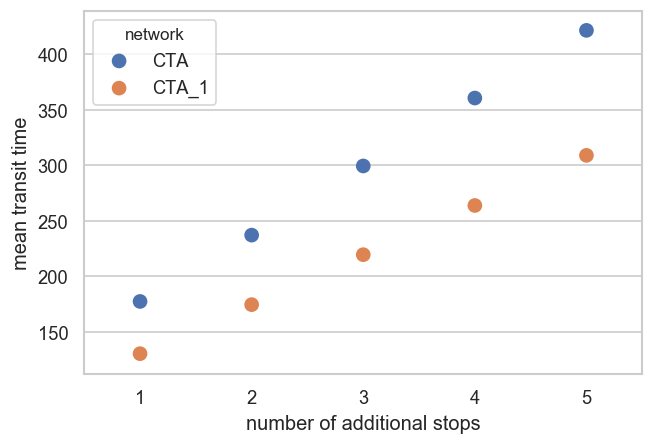

In [12]:
sns.set(style="whitegrid")
plt.figure(dpi=120)
# sns.pointplot(x='n_stops', y='transit_times', data=data_base_grid, estimator=np.mean, alpha=0.3, saturation=0.7, ci=68, join=False, color='C0')
# sns.pointplot(x='n_stops', y='transit_times', data=data_extra_line, estimator=np.mean, alpha=0.3, saturation=0.7, ci=68, join=False, color='C1')
sns.pointplot(x='n_stops', y='transit_times', data=data, hue='network', estimator=np.mean, alpha=0.3, saturation=0.7, ci=68, join=False)
plt.xlabel('number of additional stops')
plt.ylabel('mean transit time')
plt.show()

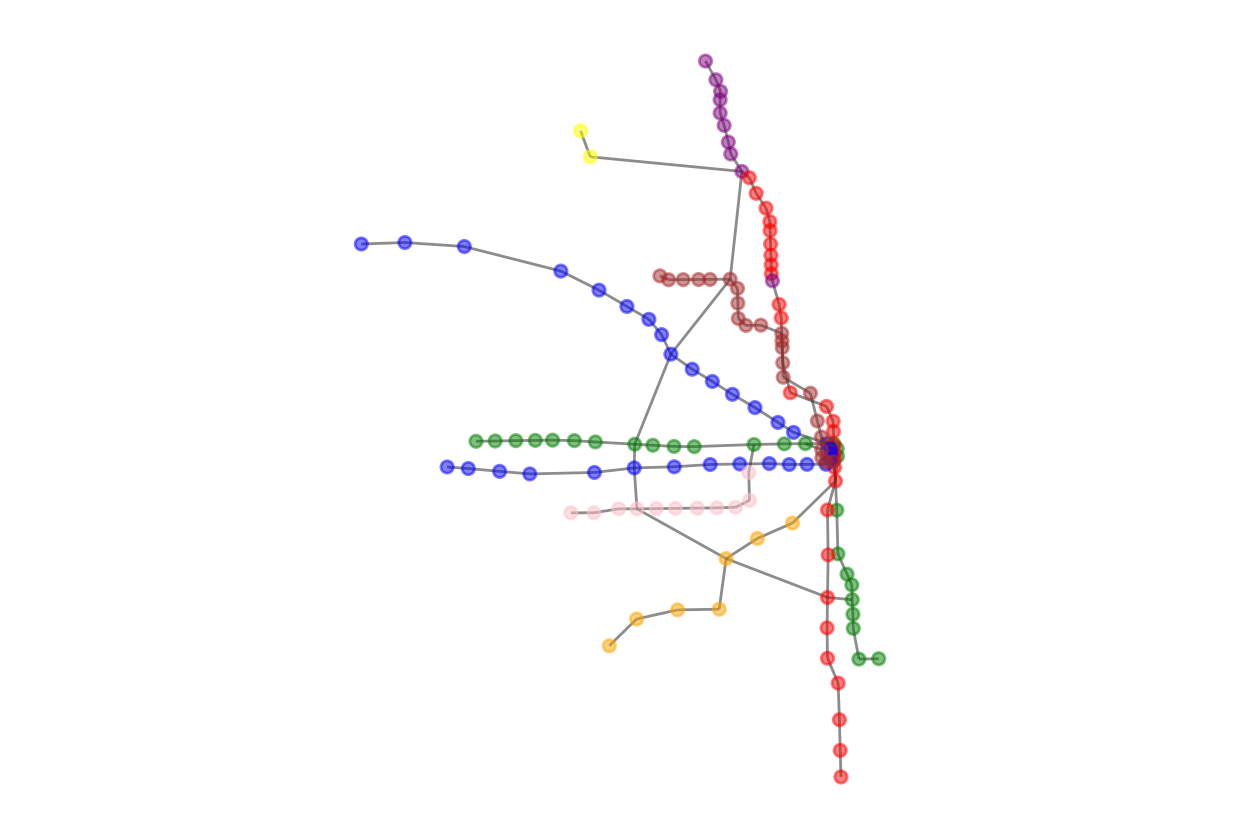

In [8]:
g = tm.add_line('CTA_data/new_line_1.txt', g, 'lightblue')
node_coords = {}
for n in g:
    node_coords[n] = g.nodes[n]['pos']
colors = [g.nodes[i]['population'] for i in g.nodes]
plt.figure(dpi=200)
nx.draw(g, node_coords,
        alpha=0.5,
        node_size=20,
        node_color=[g.nodes[i]['nodecolor'] for i in g.nodes])
plt.axis('equal')
plt.show()